## `np.empty` or `np.zeros`?

Do we gain something by "initializing" with `np.empty` instead of `np.zeros`?
Note that the first few snippets do not allocate memory (NumPy reserves the memory until it is actually touched). In the last benchmark we write 0 everywhere.

In [1]:
import numpy as np
from plot_machinery.plot import data, kernel, plot, repeat_count, clear_kernels

In [2]:
clear_kernels()


@kernel()
def empty(n, dtype):
    return np.empty(n, dtype=dtype)


@kernel()
def zeros(n, dtype):
    return np.zeros(n, dtype=dtype)

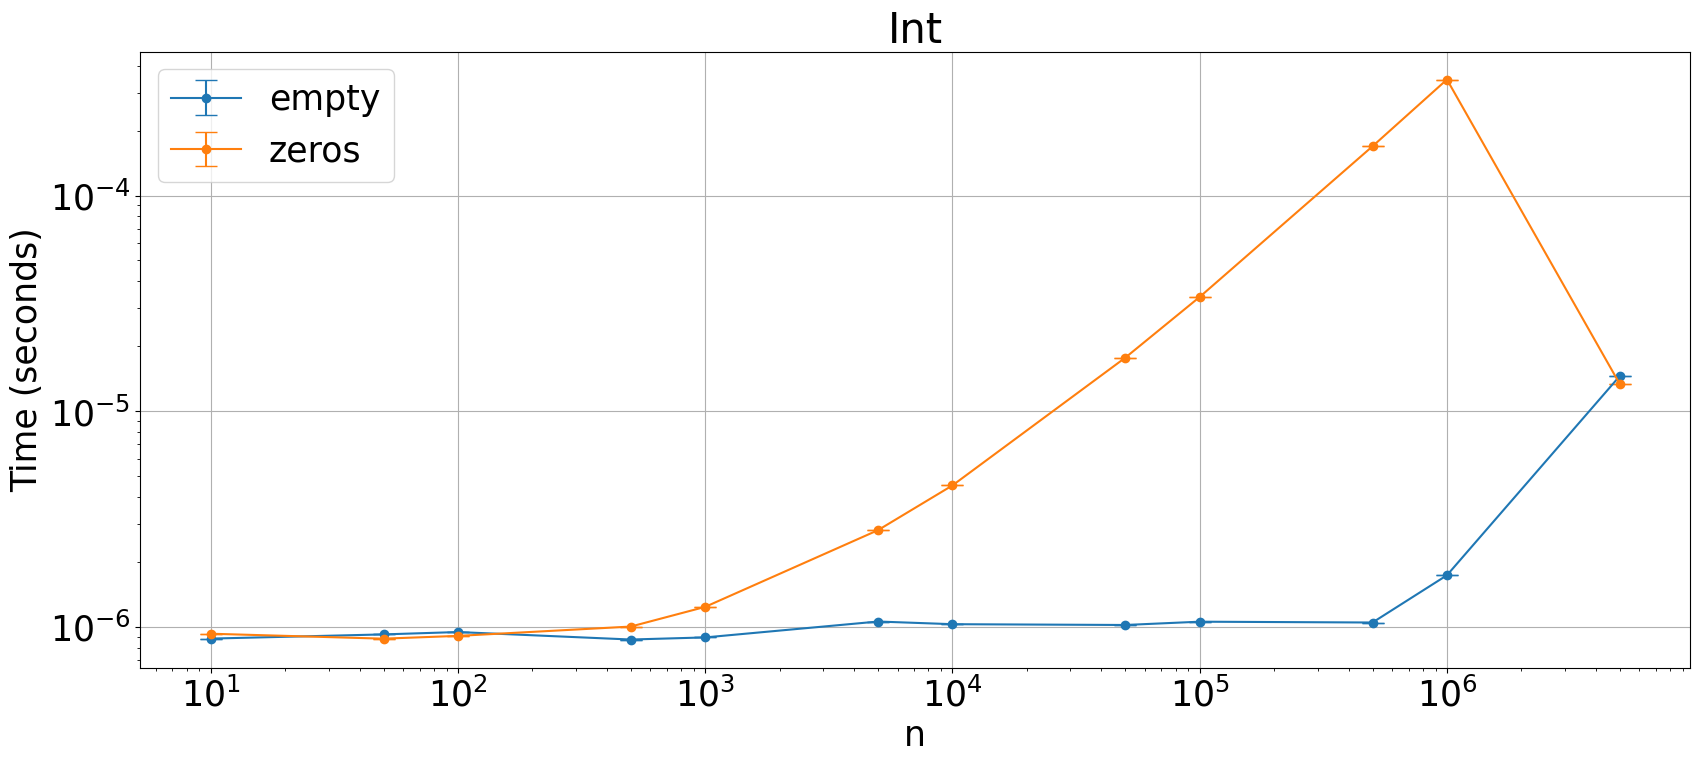

In [3]:
@data(
    steps=[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
)
def data_gen(step):
    return (step, int)


plot(logx=True, logy=True, xlabel="n", title="Int")

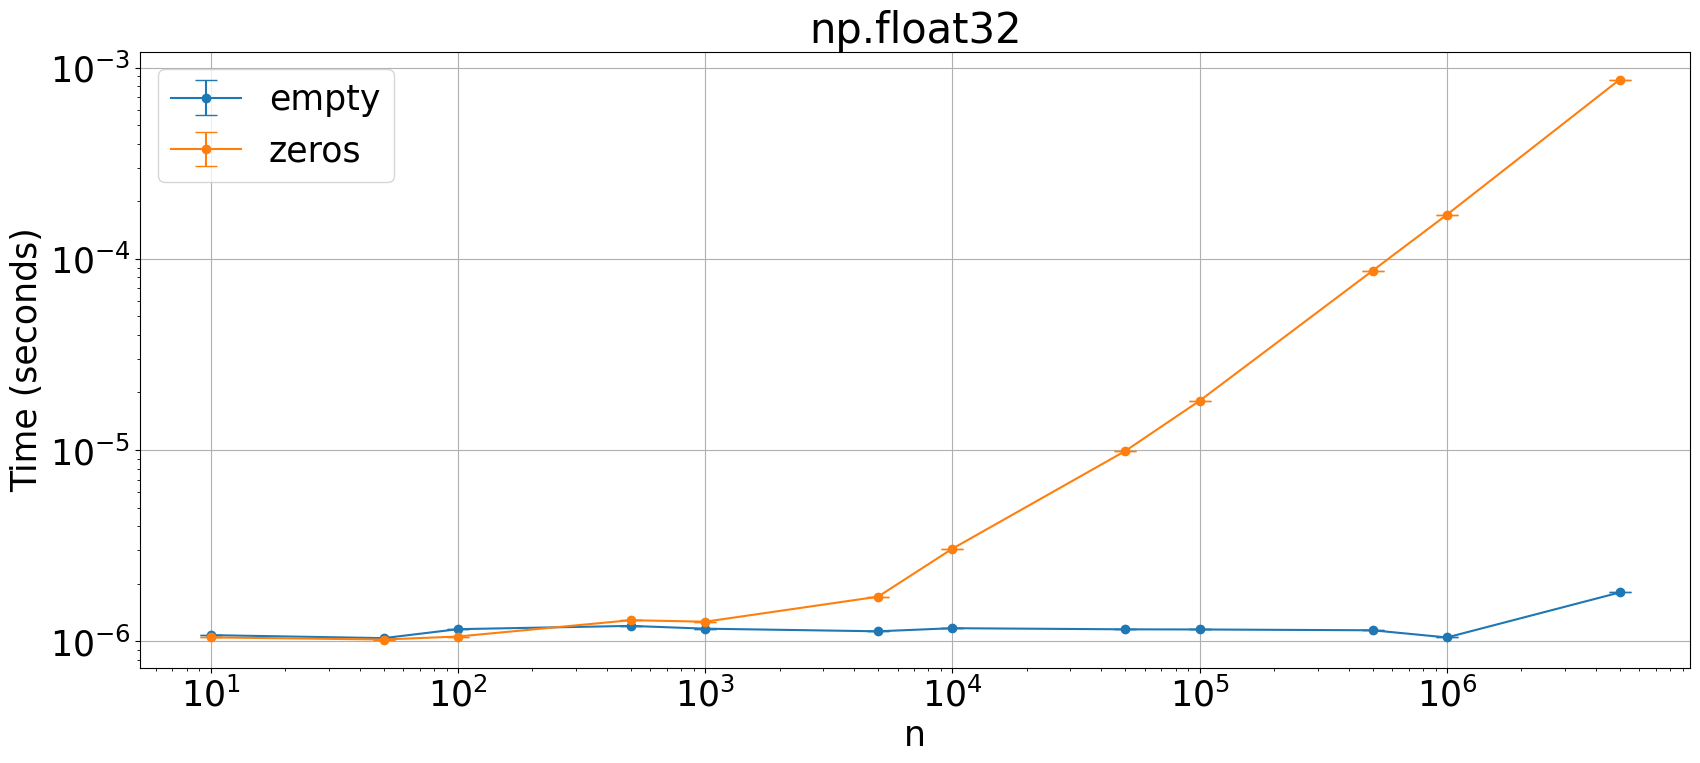

In [4]:
@data(
    steps=[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
)
def data_gen(step):
    return (step, np.float32)


plot(logx=True, logy=True, xlabel="n", title="np.float32")

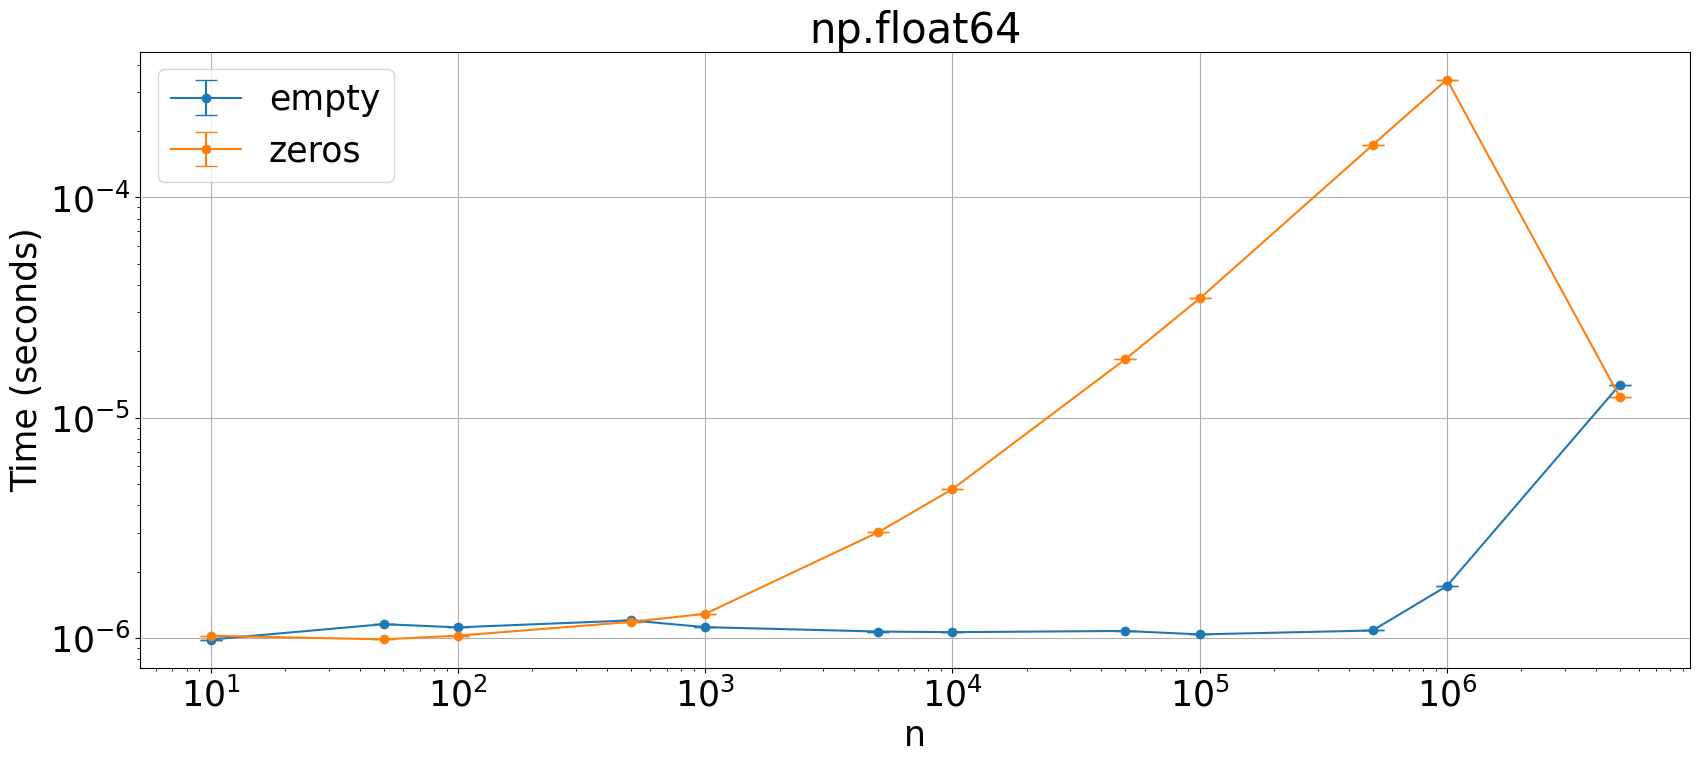

In [5]:
@data(
    steps=[10, 50, 100, 500, 1000, 5000, 10000, 50000, 100000, 500000, 1000000, 5000000]
)
def data_gen(step):
    return (step, np.float64)


plot(logx=True, logy=True, xlabel="n", title="np.float64")

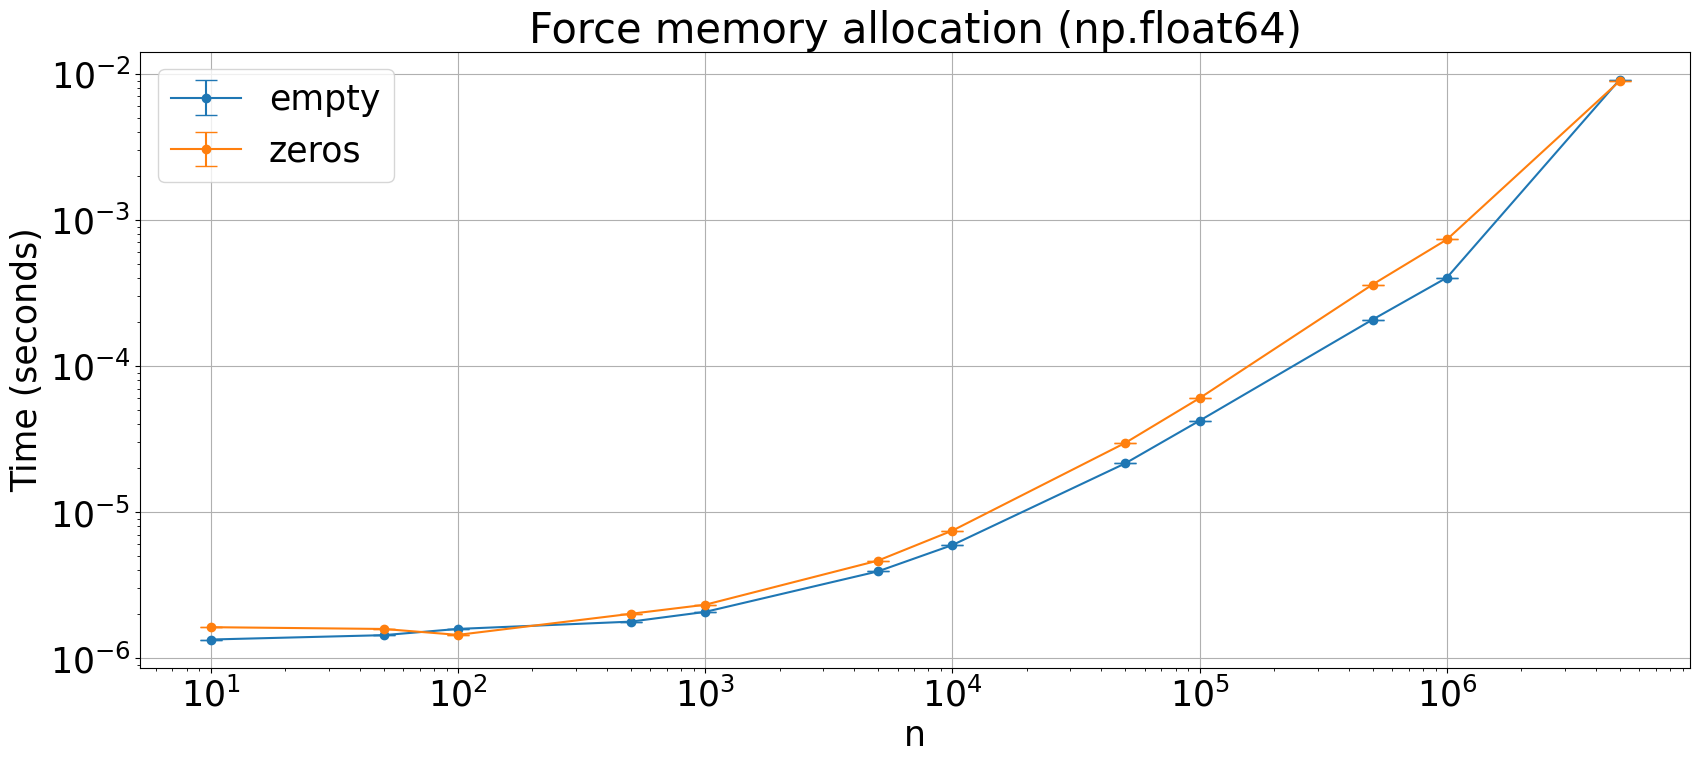

In [6]:
clear_kernels()


@kernel()
def empty(n, dtype):
    A = np.empty(n, dtype=dtype)
    A.fill(0)
    return A


@kernel()
def zeros(n, dtype):
    A = np.zeros(n, dtype=dtype)
    A.fill(0)
    return A


plot(logx=True, logy=True, xlabel="n", title="Force memory allocation (np.float64)")